## WEAT
  - 잘 모르는 상태로 노드만 쫓아가고 있음
  - 학습이 좀더 필요함
  - 프로젝트의 요구사항을 정확히 인지 못하고 있음
  - 제대로 하는지 잘 모르겠음

In [1]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [2]:
def cos_sim(i, j):
    return dot(i, j.T) / (norm(i) * norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B

In [3]:
import os

with open(os.getenv('HOME') + '/aiffel/weat/synopsis/synopsis.txt', 'r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

In [4]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    
    with open(os.getenv('HOME')+'/aiffel/weat/synopsis/'+file_name, 'r') as fread:
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline()
            if not line:
                break
            tokenlist = okt.pos(line, stem=True, norm=True)
            for word in tokenlist:
                if word[1] in ['Noun']:
                    result.append((word[0]))
    return ' '.join(result)


In [5]:
from konlpy.tag import Okt

okt = Okt()
tokenized = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line:
            break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ['Noun']:    # Adjective, Verb
                res.append(w[0])
                
        tokenized.append(res)

In [6]:
from gensim.models import Word2Vec

# Gensim 3.x 
model = Word2Vec(tokenized, size=100, window=5, min_count=3, sg=0)
model.most_similar(positive=['영화'])

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


[('작품', 0.8950704336166382),
 ('다큐멘터리', 0.8431891202926636),
 ('드라마', 0.8409242033958435),
 ('형식', 0.8079805970191956),
 ('소재', 0.7937343716621399),
 ('코미디', 0.7934932708740234),
 ('영화로', 0.7932129502296448),
 ('주제', 0.7885860800743103),
 ('편의', 0.7798042297363281),
 ('인터뷰', 0.7784631848335266)]

In [21]:
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [22]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

In [25]:
m1 = X[0].tocoo()
m2 = X[1].tocoo()

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)
w2.sort(key=lambda x: x[1], reverse=True)

print('예술영화를 대표하는 단어들: ')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')
    
print('\n')

print('일반영화를 대표하는 단어들: ')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들: 
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 상황, 간다, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 감정, 만난, 국제, 처음, 충격, 살인, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들: 
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 동생, 의도, 하루, 위기, 계획, 정체, 한국, 

In [26]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])
    
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv):
        target_art.append(w1_[i])
    if len(target_art) == n:
        break
        
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv):
        target_gen.append(w2_[i])
    if len(target_gen) == n:
        break

In [ ]:
# print(target_art)
# print(target_gen)

In [11]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [12]:
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [30]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


In [31]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
  
attributes = []

not_word = ['그녀', '위해', '남편', '아내', '남자', '자신']

for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) <= 15):
        if ((vectorizer.get_feature_names()[w[i][j][0]] not in not_word) and
                (vectorizer.get_feature_names()[w[i][j][0]] in model.wv)):
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
        
    attributes.append(attr)
    print() 

SF: 지구, 시작, 사람, 인류, 인간, 미래, 우주, 로봇, 세계, 모든, 박사, 우주선, 외계, 존재, 세상, 발견, 
가족: 엄마, 아빠, 가족, 영화제, 친구, 아주르, 아버지, 시작, 아들, 마을, 국제, 낙타, 할머니, 씨제이, 동구, 사랑, 
공연: 오페라, 사랑, 토스카, 실황, 올레, 카바, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 카르피, 비바, 왕자, 콘서트, 
공포(호러): 시작, 사람, 친구, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 좀비, 영화, 사실, 소녀, 하나, 살인, 
기타: 영화제, 국제, 서울, 단편, 영화, 사람, 이야기, 시작, 사랑, 뉴미디어, 페스티벌, 여자, 대한, 독립, 친구, 작품, 
다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 대한, 감독, 서울, 우리, 시작, 세계, 통해, 여성, 가족, 
드라마: 영화제, 사람, 사랑, 영화, 시작, 국제, 친구, 이야기, 엄마, 여자, 아버지, 가족, 단편, 서울, 대한, 아들, 
멜로로맨스: 사랑, 시작, 여자, 사람, 친구, 섹스, 마음, 결혼, 서로, 관계, 부부, 엄마, 아버지, 사실, 영화, 점점, 
뮤지컬: 뮤지컬, 사랑, 에스메랄다, 음악, 충무로, 모차르트, 영화, 토스카, 니웨, 카바, 영화제, 바흐, 페뷔스, 프롤, 모도, 카르피, 
미스터리: 사건, 시작, 사람, 발견, 사고, 진실, 죽음, 기억, 살인, 친구, 아이, 민혁, 사실, 의문, 미스터리, 형사, 
범죄: 사건, 경찰, 시작, 범죄, 조직, 살인, 사람, 마약, 형사, 모든, 살해, 수사, 발견, 한길수, 범인, 계획, 
사극: 조선, 시작, 신기전, 사랑, 아가멤논, 황제, 루안, 최고, 운명, 사람, 하선, 전쟁, 윤서, 트로이, 세자, 허균, 
서부극(웨스턴): 서부, 보안관, 벌린, 카우보이, 그레이프바인, 헨리, 마을, 개릿, 아이, 시작, 무법자, 프린트, 마적, 태구, 현상금, 분노, 
성인물(에로): 마사지, 섹스, 관계, 영화, 

In [32]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [33]:
def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

In [34]:
A = np.array([model.wv[word] for word in target_art])
B = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        X = np.array([model.wv[word] for word in attributes[i]])
        Y = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

In [35]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
#        if matrix[i][j] > 1.1 or matrix[i][j] < -1.1:
            print(genre_name[i], genre_name[j],matrix[i][j])

SF 가족 -0.5857865
SF 공연 -0.26919138
SF 공포(호러) -0.76437455
SF 기타 0.37112793
SF 다큐멘터리 0.68454903
SF 드라마 -0.24672604
SF 멜로로맨스 -1.2592403
SF 뮤지컬 0.3236329
SF 미스터리 -1.0904838
SF 범죄 -0.36193737
SF 사극 -0.54342437
SF 서부극(웨스턴) -0.7100099
SF 성인물(에로) -0.9519977
SF 스릴러 -1.072623
SF 애니메이션 0.21285157
SF 액션 -0.39609334
SF 어드벤처 -0.77235234
SF 전쟁 0.26891443
SF 코미디 -0.6157012
SF 판타지 -0.034663033
가족 공연 0.31061947
가족 공포(호러) 0.103039876
가족 기타 0.715056
가족 다큐멘터리 0.914164
가족 드라마 0.28738913
가족 멜로로맨스 -0.3623863
가족 뮤지컬 0.6738917
가족 미스터리 -0.069391966
가족 범죄 0.41382343
가족 사극 0.18468097
가족 서부극(웨스턴) 0.16968761
가족 성인물(에로) -0.11292669
가족 스릴러 -0.08743785
가족 애니메이션 0.6192073
가족 액션 0.34483275
가족 어드벤처 0.05690744
가족 전쟁 0.7088131
가족 코미디 0.055088796
가족 판타지 0.46987903
공연 공포(호러) -0.29581982
공연 기타 0.49408463
공연 다큐멘터리 0.720764
공연 드라마 -0.005424835
공연 멜로로맨스 -0.77298045
공연 뮤지컬 0.45347762
공연 미스터리 -0.5085047
공연 범죄 0.047866825
공연 사극 -0.1751366
공연 서부극(웨스턴) -0.22985645
공연 성인물(에로) -0.5076776
공연 스릴러 -0.5190842
공연 애니메이션 0.3726157
공연 액션 -0.015

<AxesSubplot:>

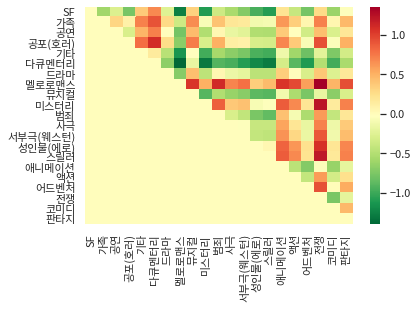

In [36]:
import numpy as np; 
import seaborn as sns; 

np.random.seed(0)

# 한글 지원 폰트
sns.set(font="Noto Sans CJK JP")

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=False,  cmap='RdYlGn_r')
ax